# SANDEEP KUMAR- DATA SCIENCE INTERN AT LETSGROWMORE VIRTUAL INTERNSHIP (LGMVIP NOVEMBER 2021)
## TASK 1 - Iris Flower Classification
## LEVEL - Beginner

### IMPORTING MODULES AND MODULES FUNCTION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

# Loading iris flower data

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 6)

In [8]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## MISSING VALUES

In [51]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
iris.mean()

<ipython-input-14-7eed97565d6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [15]:
iris.median()

<ipython-input-15-7f9b4600b8ea>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.median()


Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [16]:
iris.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [17]:
iris.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [19]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
iris.sort_values(by = 'SepalLengthCm')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...,...
122,123,7.7,2.8,6.7,2.0,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica


## VISUALIZING IRIS DATASET BY SEABORN LIBRARY

<AxesSubplot:ylabel='Count'>

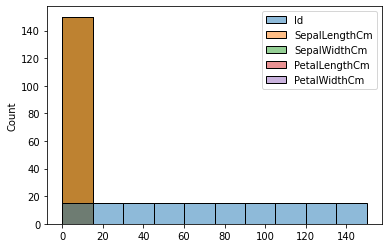

In [26]:
sns.histplot(iris, bins=10)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

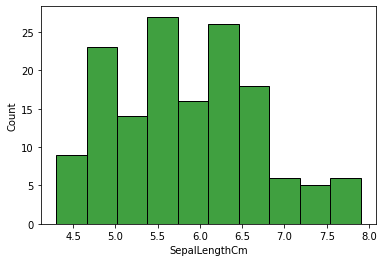

In [41]:
sns.histplot(iris['SepalLengthCm'],color ="green",bins = 10)

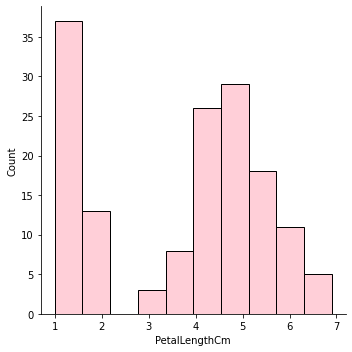

In [39]:
sns.displot(iris['PetalLengthCm'],color ="pink",bins = 10)
plt.show()

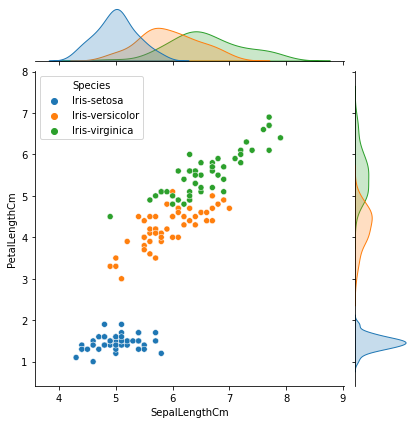

In [47]:
sns.jointplot(x='SepalLengthCm',y='PetalLengthCm',data=iris,hue='Species')
plt.show()

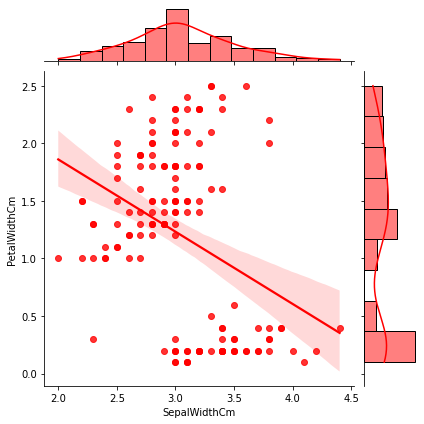

In [46]:
sns.jointplot(x='SepalWidthCm',y='PetalWidthCm',data=iris,color='red',kind='reg')
plt.show()

## VISUALIZATION OF WHOLE IRIS DATA SET BY SEABORN(sns)

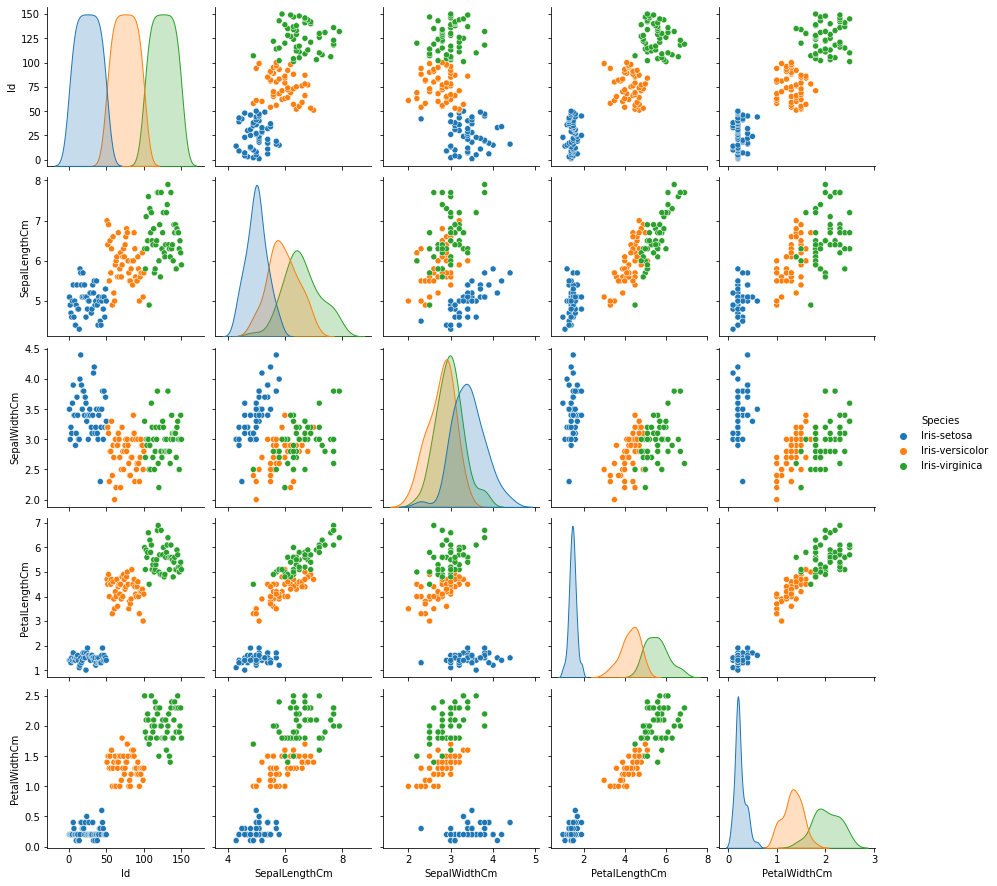

In [43]:
sns.pairplot(iris, hue='Species')

## CORRELATION

In [48]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## HEATMAP

<AxesSubplot:>

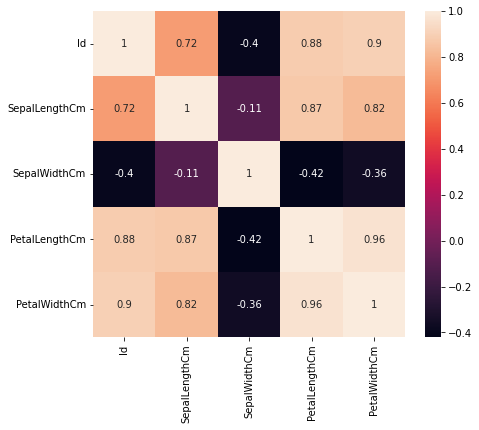

In [50]:
corr = iris.corr()
fig , ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr,annot = True)

## SPLITTING DATASET INTO TRAINING AND TEST SET

In [74]:
X = iris.drop(columns=['Species'])
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## ENCODING VARIABLES

In [59]:
lab_encoder = LabelEncoder()
iris['Species'] = lab_encoder.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [80]:
regr_model = LogisticRegression()
regr_model.fit(X_train,y_train)

In [76]:
predictions = regr_model.predict(X_test)

## EVALUATING THE MODEL

In [78]:
acc = metrics.accuracy_score(y_test, predictions)*100
scr = regr_model.score(X_test, y_test)*100

In [79]:
print(f"Accuracy : {acc}\nScore : {scr}")

Accuracy : 97.77777777777777
Score : 97.77777777777777


# THANK YOU